In [1]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# from kan import KAN, add_symbolic
# from torch.utils.data import TensorDataset, DataLoader

# # Load the dataset
# data_path = 'RoofTypicalDays_Winter Typical.csv'
# data = pd.read_csv(data_path)

# # Define input and output columns
# input_columns = [ 'Temp', 'Dew', 'Hum', 'Pres', 'Area', 'u-Value (Roof)', 'Heat Capacity']
# output_column = 'Winter Typical:Heat Flow'

# # Prepare the data
# X = data[input_columns].values
# y = data[output_column].values

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize the data
# x_mean = np.mean(X_train, axis=0)
# x_std = np.std(X_train, axis=0)
# y_mean = np.mean(y_train)
# y_std = np.std(y_train)

# X_train_scaled = (X_train - x_mean) / x_std
# X_test_scaled = (X_test - x_mean) / x_std
# y_train_scaled = (y_train - y_mean) / y_std
# y_test_scaled = (y_test - y_mean) / y_std

# # Convert to tensors
# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).unsqueeze(1)
# y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).unsqueeze(1)

# # Create data loaders
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # Define the ANN model
# class ANN(nn.Module):
#     def __init__(self):
#         super(ANN, self).__init__()
#         self.layer1 = nn.Linear(X_train_tensor.shape[1], 64)
#         self.layer2 = nn.Linear(64, 32)
#         self.layer3 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = torch.relu(self.layer1(x))
#         x = torch.relu(self.layer2(x))
#         x = self.layer3(x)
#         return x

# # Train the ANN model
# def train_ann(model, train_loader, criterion, optimizer, epochs=100):
#     model.train()
#     for epoch in range(epochs):
#         for inputs, targets in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, targets)
#             loss.backward()
#             optimizer.step()
#         if (epoch+1) % 10 == 0:
#             print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# # Evaluate the ANN model
# def evaluate_ann(model, test_loader, criterion):
#     model.eval()
#     predictions = []
#     actuals = []
#     with torch.no_grad():
#         for inputs, targets in test_loader:
#             outputs = model(inputs)
#             predictions.append(outputs.numpy())
#             actuals.append(targets.numpy())
#     predictions = np.concatenate(predictions)
#     actuals = np.concatenate(actuals)
#     loss = criterion(torch.tensor(predictions), torch.tensor(actuals)).item()
#     return predictions, actuals, loss

# # Initialize and train the ANN model
# ann_model = ANN()
# criterion = nn.MSELoss()
# optimizer = optim.Adam(ann_model.parameters(), lr=0.001)
# train_ann(ann_model, train_loader, criterion, optimizer, epochs=100)

# # Evaluate the ANN model
# predictions_ann, actuals_ann, loss_ann = evaluate_ann(ann_model, test_loader, criterion)

# # Denormalize the predictions and actuals
# predictions_ann_denorm = predictions_ann * y_std + y_mean
# actuals_ann_denorm = actuals_ann * y_std + y_mean

# # Calculate metrics for ANN
# mae_ann = mean_absolute_error(actuals_ann_denorm, predictions_ann_denorm)
# mse_ann = mean_squared_error(actuals_ann_denorm, predictions_ann_denorm)
# r2_ann = r2_score(actuals_ann_denorm, predictions_ann_denorm)

# print(f"ANN Performance: MAE: {mae_ann}, MSE: {mse_ann}, R2: {r2_ann}")

# # Train the KAN model using the tutorial's approach
# kan_model = KAN(width=[len(input_columns), 20, 1], grid=5, k=3, seed=0)

# dataset = {
#     'train_input': X_train_tensor,
#     'train_label': y_train_tensor,
#     'test_input': X_test_tensor,
#     'test_label': y_test_tensor
# }
# kan_model.train(dataset, opt="LBFGS", steps=50, lamb=0.001, lamb_entropy=1.0)

# # Automatically set activation functions to be symbolic
# # lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'sin', 'abs']
# # kan_model.auto_symbolic(lib=lib)
# # kan_model.auto_symbolic()
# # # Prune the KAN model
# # # kan_model.prune()

# # # Plot the KAN model
# # kan_model.plot()
# # kan_model.plot(mask=True)


# # # symbolic_formula, x0 = symbolic_formula_with_handling(kan_model, normalizer=[x_mean, x_std], output_normalizer=[[y_mean], [y_std]])
# # symbolic_formula = kan_model.symbolic_formula()[0][0]
# # symbolic_formula

# # print("Discovered Symbolic Formula:")
# # print(symbolic_formula)

# # Evaluate the KAN model
# # kan_model.eval()
# with torch.no_grad():
#     predictions_kan_scaled = kan_model(X_test_tensor).numpy()

# # Denormalize the predictions and actuals for KAN
# predictions_kan_denorm = predictions_kan_scaled * y_std + y_mean

# # Calculate metrics for KAN
# mae_kan = mean_absolute_error(y_test, predictions_kan_denorm)
# mse_kan = mean_squared_error(y_test, predictions_kan_denorm)
# r2_kan = r2_score(y_test, predictions_kan_denorm)

# print(f"KAN Performance: MAE: {mae_kan}, MSE: {mse_kan}, R2: {r2_kan}")

# # Plot comparison of actual vs predicted for ANN and KAN
# plt.figure(figsize=(14, 7))
# plt.subplot(1, 2, 1)
# plt.plot(actuals_ann_denorm, label='Actual')
# plt.plot(predictions_ann_denorm, label='Predicted')
# plt.title('ANN Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Output')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(y_test, label='Actual')
# plt.plot(predictions_kan_denorm, label='Predicted')
# plt.title('KAN Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Output')
# plt.legend()

# plt.tight_layout()
# plt.savefig('Prediction_Comparison.png', dpi=300)
# plt.show()


In [2]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# from kan import KAN, add_symbolic
# from torch.utils.data import TensorDataset, DataLoader

# # Load the dataset
# data_path = 'RoofTypicalDays_Winter Typical.csv'
# data = pd.read_csv(data_path)

# # Define input and output columns
# input_columns = ['Temp', 'Dew', 'Hum', 'Pres', 'Area', 'u-Value (Roof)', 'Heat Capacity']
# output_column = 'Winter Typical:Heat Flow'

# # Prepare the data
# X = data[input_columns].values
# y = data[output_column].values

# # Split the dataset into multiple tasks
# num_tasks = 3
# X_splits = np.array_split(X, num_tasks)
# y_splits = np.array_split(y, num_tasks)

# # Normalize the data
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_splits_scaled = [scaler_X.fit_transform(X_split) for X_split in X_splits]
# y_splits_scaled = [scaler_y.fit_transform(y_split.reshape(-1, 1)).flatten() for y_split in y_splits]

# # Convert to tensors
# X_splits_tensors = [torch.tensor(X_split, dtype=torch.float32) for X_split in X_splits_scaled]
# y_splits_tensors = [torch.tensor(y_split, dtype=torch.float32).unsqueeze(1) for y_split in y_splits_scaled]

# # Define the ANN model
# class ANN(nn.Module):
#     def __init__(self):
#         super(ANN, self).__init__()
#         self.layer1 = nn.Linear(X_splits_tensors[0].shape[1], 64)
#         self.layer2 = nn.Linear(64, 32)
#         self.layer3 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = torch.relu(self.layer1(x))
#         x = torch.relu(self.layer2(x))
#         x = self.layer3(x)
#         return x

# # Train the ANN model with early stopping
# def train_ann(model, train_loader, val_loader, criterion, optimizer, epochs=100, patience=10):
#     best_loss = float('inf')
#     best_model_state = None
#     patience_counter = 0

#     for epoch in range(epochs):
#         model.train()
#         for inputs, targets in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, targets)
#             loss.backward()
#             optimizer.step()

#         # Validation step
#         model.eval()
#         val_loss = 0
#         with torch.no_grad():
#             for inputs, targets in val_loader:
#                 outputs = model(inputs)
#                 val_loss += criterion(outputs, targets).item()
#         val_loss /= len(val_loader)

#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

#         if val_loss < best_loss:
#             best_loss = val_loss
#             best_model_state = model.state_dict()
#             patience_counter = 0
#         else:
#             patience_counter += 1

#         if patience_counter >= patience:
#             print("Early stopping triggered")
#             break

#     # Load the best model
#     if best_model_state is not None:
#         model.load_state_dict(best_model_state)

# # Evaluate the ANN model
# def evaluate_ann(model, X_tensors, y_tensors):
#     model.eval()
#     all_predictions = []
#     all_actuals = []
#     with torch.no_grad():
#         for X, y in zip(X_tensors, y_tensors):
#             outputs = model(X)
#             all_predictions.append(outputs.numpy())
#             all_actuals.append(y.numpy())
#     return all_predictions, all_actuals

# # Define function to calculate performance metrics
# def calculate_metrics(predictions, actuals, y_std, y_mean):
#     predictions_denorm = predictions * y_std + y_mean
#     actuals_denorm = actuals * y_std + y_mean
#     mae = mean_absolute_error(actuals_denorm, predictions_denorm)
#     mse = mean_squared_error(actuals_denorm, predictions_denorm)
#     r2 = r2_score(actuals_denorm, predictions_denorm)
#     return mae, mse, r2

# # Initialize and train the ANN model on sequential tasks
# ann_model = ANN()
# criterion = nn.MSELoss()
# optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

# for task_id in range(num_tasks):
#     print(f"Training on task {task_id + 1}")
#     train_dataset = TensorDataset(X_splits_tensors[task_id], y_splits_tensors[task_id])
#     train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#     val_dataset = TensorDataset(X_splits_tensors[(task_id+1) % num_tasks], y_splits_tensors[(task_id+1) % num_tasks])
#     val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#     train_ann(ann_model, train_loader, val_loader, criterion, optimizer, epochs=50, patience=10)

#     print("Evaluating on all tasks")
#     all_predictions, all_actuals = evaluate_ann(ann_model, X_splits_tensors, y_splits_tensors)
#     for i in range(num_tasks):
#         mae, mse, r2 = calculate_metrics(all_predictions[i], all_actuals[i], y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])
#         print(f"Task {i + 1} - MAE: {mae}, MSE: {mse}, R2: {r2}")

# # Train the KAN model using the tutorial's approach with early stopping
# def train_kan_with_early_stopping(model, dataset, patience=5, steps=200):
#     best_loss = float('inf')
#     best_model_state = None
#     patience_counter = 0

#     optimizer = torch.optim.LBFGS(model.parameters(), lr=1)

#     def closure():
#         optimizer.zero_grad()
#         outputs = model(dataset['train_input'])
#         loss = nn.MSELoss()(outputs, dataset['train_label'])
#         loss.backward()
#         return loss

#     for step in range(steps):
#         optimizer.step(closure)
        
#         # Validation step
# #         model.eval()
#         with torch.no_grad():
#             val_outputs = model(dataset['test_input'])
#             val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()

#         print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')

#         if val_loss < best_loss:
#             best_loss = val_loss
#             best_model_state = model.state_dict()
#             patience_counter = 0
#         else:
#             patience_counter += 1

#         if patience_counter >= patience:
#             print("Early stopping triggered")
#             break

#     # Load the best model
#     if best_model_state is not None:
#         model.load_state_dict(best_model_state)

# kan_model = KAN(width=[len(input_columns), 15, 1], grid=10, k=3, seed=0)

# for task_id in range(num_tasks):
#     print(f"Training on task {task_id + 1}")
#     dataset = {
#         'train_input': X_splits_tensors[task_id],
#         'train_label': y_splits_tensors[task_id],
#         'test_input': X_splits_tensors[(task_id+1) % num_tasks],
#         'test_label': y_splits_tensors[(task_id+1) % num_tasks]
#     }
#     train_kan_with_early_stopping(kan_model, dataset, patience=3, steps=100)

#     print("Evaluating on all tasks")
#     all_predictions_kan = []
#     for X in X_splits_tensors:
#         with torch.no_grad():
#             predictions_kan_scaled = kan_model(X).numpy()
#         all_predictions_kan.append(predictions_kan_scaled)

#     for i in range(num_tasks):
#         mae, mse, r2 = calculate_metrics(all_predictions_kan[i], y_splits_scaled[i], y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])
#         print(f"Task {i + 1} - MAE: {mae}, MSE: {mse}, R2: {r2}")

# # Plot comparison of actual vs predicted for ANN and KAN
# for task_id in range(num_tasks):
#     plt.figure(figsize=(14, 7))
#     plt.subplot(1, 2, 1)
#     plt.plot(y_splits_scaled[task_id], label='Actual')
#     plt.plot(all_predictions[task_id], label='ANN Predicted')
#     plt.title(f'ANN Predictions for Task {task_id + 1}')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Output')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(y_splits_scaled[task_id], label='Actual')
#     plt.plot(all_predictions_kan[task_id], label='KAN Predicted')
#     plt.title(f'KAN Predictions for Task {task_id + 1}')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Output')
#     plt.legend()

#     plt.tight_layout()
#     plt.savefig(f'Prediction_Comparison_Task_{task_id + 1}.png', dpi=300)
#     plt.show()


In [3]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# from kan import KAN, add_symbolic
# from torch.utils.data import TensorDataset, DataLoader

# # Load the dataset
# data_path = 'RoofTypicalDays_Winter Typical.csv'
# data = pd.read_csv(data_path)

# # Define input and output columns
# input_columns = ['Temp', 'Dew', 'Hum', 'Pres', 'Area', 'u-Value (Roof)', 'Heat Capacity']
# output_column = 'Winter Typical:Heat Flow'
# num_tasks = 3

# # Prepare the data
# X = data[input_columns].values
# y = data[output_column].values

# # Define subsampling rates
# subsample_rates = [1, 0.5, 0.25, 0.1]

# # Define the ANN model
# class ANN(nn.Module):
#     def __init__(self):
#         super(ANN, self).__init__()
#         self.layer1 = nn.Linear(X.shape[1], 64)
#         self.layer2 = nn.Linear(64, 32)
#         self.layer3 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = torch.relu(self.layer1(x))
#         x = torch.relu(self.layer2(x))
#         x = self.layer3(x)
#         return x

# # Train the ANN model with early stopping
# def train_ann(model, train_loader, val_loader, criterion, optimizer, epochs=200, patience=10):
#     best_loss = float('inf')
#     best_model_state = None
#     patience_counter = 0

#     for epoch in range(epochs):
#         model.train()
#         for inputs, targets in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, targets)
#             loss.backward()
#             optimizer.step()

#         # Validation step
#         model.eval()
#         val_loss = 0
#         with torch.no_grad():
#             for inputs, targets in val_loader:
#                 outputs = model(inputs)
#                 val_loss += criterion(outputs, targets).item()
#         val_loss /= len(val_loader)

#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

#         if val_loss < best_loss:
#             best_loss = val_loss
#             best_model_state = model.state_dict()
#             patience_counter = 0
#         else:
#             patience_counter += 1

#         if patience_counter >= patience:
#             print("Early stopping triggered")
#             break

#     # Load the best model
#     if best_model_state is not None:
#         model.load_state_dict(best_model_state)

# # Evaluate the ANN model
# def evaluate_ann(model, X_tensors, y_tensors):
#     model.eval()
#     all_predictions = []
#     all_actuals = []
#     with torch.no_grad():
#         for X, y in zip(X_tensors, y_tensors):
#             outputs = model(X)
#             all_predictions.append(outputs.numpy())
#             all_actuals.append(y.numpy())
#     return all_predictions, all_actuals

# # Define function to calculate performance metrics
# def calculate_metrics(predictions, actuals, y_std, y_mean):
#     predictions_denorm = predictions * y_std + y_mean
#     actuals_denorm = actuals * y_std + y_mean
#     mae = mean_absolute_error(actuals_denorm, predictions_denorm)
#     mse = mean_squared_error(actuals_denorm, predictions_denorm)
#     r2 = r2_score(actuals_denorm, predictions_denorm)
#     return mae, mse, r2

# # Train the KAN model using the tutorial's approach with early stopping
# def train_kan_with_early_stopping(model, dataset, patience=5, steps=200):
#     best_loss = float('inf')
#     best_model_state = None
#     patience_counter = 0

#     optimizer = torch.optim.LBFGS(model.parameters(), lr=1)

#     def closure():
#         optimizer.zero_grad()
#         outputs = model(dataset['train_input'])
#         loss = nn.MSELoss()(outputs, dataset['train_label'])
#         loss.backward()
#         return loss

#     for step in range(steps):
#         optimizer.step(closure)
        
#         # Validation step
#         with torch.no_grad():
#             val_outputs = model(dataset['test_input'])
#             val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()

#         print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')

#         if val_loss < best_loss:
#             best_loss = val_loss
#             best_model_state = model.state_dict()
#             patience_counter = 0
#         else:
#             patience_counter += 1

#         if patience_counter >= patience:
#             print("Early stopping triggered")
#             break

#     # Load the best model
#     if best_model_state is not None:
#         model.load_state_dict(best_model_state)

# # Function to train and evaluate models on each subsample rate
# def train_and_evaluate_models(subsample_rate, X, y):
#     # Subsample the data
#     if subsample_rate < 1:
#         X_sub, _, y_sub, _ = train_test_split(X, y, test_size=1 - subsample_rate, random_state=42)
#     else:
#         X_sub, y_sub = X, y

#     # Split the dataset into multiple tasks
# #     num_tasks = 3
#     X_splits = np.array_split(X_sub, num_tasks)
#     y_splits = np.array_split(y_sub, num_tasks)

#     # Normalize the data
#     scaler_X = StandardScaler()
#     scaler_y = StandardScaler()

#     X_splits_scaled = [scaler_X.fit_transform(X_split) for X_split in X_splits]
#     y_splits_scaled = [scaler_y.fit_transform(y_split.reshape(-1, 1)).flatten() for y_split in y_splits]

#     # Convert to tensors
#     X_splits_tensors = [torch.tensor(X_split, dtype=torch.float32) for X_split in X_splits_scaled]
#     y_splits_tensors = [torch.tensor(y_split, dtype=torch.float32).unsqueeze(1) for y_split in y_splits_scaled]

#     # Initialize and train the ANN model on sequential tasks
#     ann_model = ANN()
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

#     ann_r2_scores = [[] for _ in range(num_tasks)]
#     for task_id in range(num_tasks):
#         print(f"Training ANN on task {task_id + 1} with subsample rate {subsample_rate}")
#         train_dataset = TensorDataset(X_splits_tensors[task_id], y_splits_tensors[task_id])
#         train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#         val_dataset = TensorDataset(X_splits_tensors[(task_id + 1) % num_tasks], y_splits_tensors[(task_id + 1) % num_tasks])
#         val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#         train_ann(ann_model, train_loader, val_loader, criterion, optimizer, epochs=200, patience=10)

#         print("Evaluating ANN on all tasks")
#         all_predictions, all_actuals = evaluate_ann(ann_model, X_splits_tensors, y_splits_tensors)
#         for i in range(num_tasks):
#             mae, mse, r2 = calculate_metrics(all_predictions[i], all_actuals[i], y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])
#             ann_r2_scores[i].append(r2)
#             print(f"Task {i + 1} - MAE: {mae}, MSE: {mse}, R2: {r2}")

#     # Initialize and train the KAN model on sequential tasks
#     kan_model = KAN(width=[len(input_columns), 10, 10, 1], grid=10, k=3, seed=0)

#     kan_r2_scores = [[] for _ in range(num_tasks)]
#     for task_id in range(num_tasks):
#         print(f"Training KAN on task {task_id + 1} with subsample rate {subsample_rate}")
#         dataset = {
#             'train_input': X_splits_tensors[task_id],
#             'train_label': y_splits_tensors[task_id],
#             'test_input': X_splits_tensors[(task_id + 1) % num_tasks],
#             'test_label': y_splits_tensors[(task_id + 1) % num_tasks]
#         }
#         train_kan_with_early_stopping(kan_model, dataset, patience=3, steps=100)

#         print("Evaluating KAN on all tasks")
#         all_predictions_kan = []
#         for X in X_splits_tensors:
#             with torch.no_grad():
#                 predictions_kan_scaled = kan_model(X).numpy()
#             all_predictions_kan.append(predictions_kan_scaled)

#         for i in range(num_tasks):
#             mae, mse, r2 = calculate_metrics(all_predictions_kan[i], y_splits_scaled[i], y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])
#             kan_r2_scores[i].append(r2)
#             print(f"Task {i + 1} - MAE: {mae}, MSE: {mse}, R2: {r2}")

#     return ann_r2_scores, kan_r2_scores

# # Perform the training and evaluation for each subsample rate
# all_ann_r2_scores = [[] for _ in range(num_tasks)]
# all_kan_r2_scores = [[] for _ in range(num_tasks)]

# for subsample_rate in subsample_rates:
#     print(f"Subsample rate: {subsample_rate}")
#     ann_r2_scores, kan_r2_scores = train_and_evaluate_models(subsample_rate, X, y)
#     for i in range(num_tasks):
#         all_ann_r2_scores[i].append(ann_r2_scores[i])
#         all_kan_r2_scores[i].append(kan_r2_scores[i])

# # Convert lists to numpy arrays for easier plotting
# all_ann_r2_scores = np.array(all_ann_r2_scores)
# all_kan_r2_scores = np.array(all_kan_r2_scores)

# # Plot the R² comparison for ANN and KAN with different subsample rates for each task
# for task_id in range(num_tasks):
#     plt.figure(figsize=(14, 7))
#     bar_width = 0.15
#     index = np.arange(len(subsample_rates))

#     plt.bar(index, all_ann_r2_scores[0][:, task_id], bar_width, label=f'ANN Task 1')
#     plt.bar(index + bar_width, all_ann_r2_scores[1][:, task_id], bar_width, label=f'ANN Task 2')
#     plt.bar(index + 2 * bar_width, all_ann_r2_scores[2][:, task_id], bar_width, label=f'ANN Task 3')

#     plt.bar(index + 3 * bar_width, all_kan_r2_scores[0][:, task_id], bar_width, label=f'KAN Task 1', linestyle='--')
#     plt.bar(index + 4 * bar_width, all_kan_r2_scores[1][:, task_id], bar_width, label=f'KAN Task 2', linestyle='--')
#     plt.bar(index + 5 * bar_width, all_kan_r2_scores[2][:, task_id], bar_width, label=f'KAN Task 3', linestyle='--')

#     plt.xlabel('Subsample Rate')
#     plt.ylabel('R² Score')
#     plt.title(f'R² Comparison of ANN and KAN with Different Subsample Rates for Task {task_id + 1}')
#     plt.xticks(index + 2.5 * bar_width, subsample_rates)
#     plt.legend()
#     plt.tight_layout()
#     plt.savefig(f'R2_Comparison_Subsample_Rates_Task_{task_id + 1}.png', dpi=300)
#     plt.show()

# # Plot the average R² comparison for ANN and KAN with different subsample rates
# for task_id in range(num_tasks):
#     plt.figure(figsize=(14, 7))
#     bar_width = 0.35
#     index = np.arange(len(subsample_rates))

#     ann_mean_r2 = np.mean(all_ann_r2_scores[task_id], axis=1)
#     kan_mean_r2 = np.mean(all_kan_r2_scores[task_id], axis=1)

#     plt.bar(index - bar_width / 2, ann_mean_r2, bar_width, label='ANN')
#     plt.bar(index + bar_width / 2, kan_mean_r2, bar_width, label='KAN')

#     plt.xlabel('Subsample Rate')
#     plt.ylabel('R² Score')
#     plt.title(f'Average R² Comparison of ANN and KAN with Different Subsample Rates for Task {task_id + 1}')
#     plt.xticks(index, subsample_rates)
#     plt.legend()
#     plt.tight_layout()
#     plt.savefig(f'Average_R2_Comparison_Subsample_Rates_Task_{task_id + 1}.png', dpi=300)
#     plt.show()



Subsample rate: 1
Training ANN on task 1 with subsample rate 1
Epoch [1/200], Loss: 0.7111, Val Loss: 0.7752
Epoch [2/200], Loss: 0.6284, Val Loss: 0.7403
Epoch [3/200], Loss: 0.9900, Val Loss: 0.7346
Epoch [4/200], Loss: 0.5091, Val Loss: 0.6951
Epoch [5/200], Loss: 0.7851, Val Loss: 0.6654
Epoch [6/200], Loss: 0.6573, Val Loss: 0.6328
Epoch [7/200], Loss: 0.5601, Val Loss: 0.6099
Epoch [8/200], Loss: 0.6637, Val Loss: 0.5784
Epoch [9/200], Loss: 0.5079, Val Loss: 0.5422
Epoch [10/200], Loss: 0.6792, Val Loss: 0.5178
Epoch [11/200], Loss: 0.3966, Val Loss: 0.4809
Epoch [12/200], Loss: 0.5926, Val Loss: 0.4744
Epoch [13/200], Loss: 0.4404, Val Loss: 0.4556
Epoch [14/200], Loss: 0.4372, Val Loss: 0.4469
Epoch [15/200], Loss: 0.3184, Val Loss: 0.4347
Epoch [16/200], Loss: 0.2938, Val Loss: 0.4146
Epoch [17/200], Loss: 0.3407, Val Loss: 0.4071
Epoch [18/200], Loss: 0.6246, Val Loss: 0.3951
Epoch [19/200], Loss: 0.2909, Val Loss: 0.3854
Epoch [20/200], Loss: 0.1939, Val Loss: 0.3822
Epoch 

Epoch [15/200], Loss: 0.1106, Val Loss: 0.1611
Epoch [16/200], Loss: 0.1415, Val Loss: 0.1613
Epoch [17/200], Loss: 0.1182, Val Loss: 0.1599
Epoch [18/200], Loss: 0.1800, Val Loss: 0.1573
Epoch [19/200], Loss: 0.0592, Val Loss: 0.1618
Epoch [20/200], Loss: 0.1498, Val Loss: 0.1652
Epoch [21/200], Loss: 0.1073, Val Loss: 0.1745
Epoch [22/200], Loss: 0.1007, Val Loss: 0.1610
Epoch [23/200], Loss: 0.1206, Val Loss: 0.1881
Early stopping triggered
Evaluating ANN on all tasks
Task 1 - MAE: 1193.532958984375, MSE: 2411023.25, R2: 0.8164548604774619
Task 2 - MAE: 1111.639404296875, MSE: 2197387.5, R2: 0.8327184021641524
Task 3 - MAE: 1252.3082275390625, MSE: 2700018.5, R2: 0.7944543582351185
Training ANN on task 3 with subsample rate 1
Epoch [1/200], Loss: 0.2835, Val Loss: 0.1439
Epoch [2/200], Loss: 0.1720, Val Loss: 0.1399
Epoch [3/200], Loss: 0.1410, Val Loss: 0.1340
Epoch [4/200], Loss: 0.2197, Val Loss: 0.1358
Epoch [5/200], Loss: 0.1287, Val Loss: 0.1476
Epoch [6/200], Loss: 0.2400, Va

Epoch [86/200], Loss: 0.3288, Val Loss: 0.3223
Epoch [87/200], Loss: 0.3132, Val Loss: 0.3293
Epoch [88/200], Loss: 0.1639, Val Loss: 0.3027
Epoch [89/200], Loss: 0.1510, Val Loss: 0.3101
Epoch [90/200], Loss: 0.1217, Val Loss: 0.3328
Epoch [91/200], Loss: 0.3832, Val Loss: 0.3143
Epoch [92/200], Loss: 0.2170, Val Loss: 0.3059
Epoch [93/200], Loss: 0.1247, Val Loss: 0.3069
Epoch [94/200], Loss: 0.0950, Val Loss: 0.2970
Epoch [95/200], Loss: 0.2232, Val Loss: 0.3153
Epoch [96/200], Loss: 0.1283, Val Loss: 0.2953
Epoch [97/200], Loss: 0.2416, Val Loss: 0.3047
Epoch [98/200], Loss: 0.1430, Val Loss: 0.2987
Epoch [99/200], Loss: 0.2687, Val Loss: 0.3076
Epoch [100/200], Loss: 0.2925, Val Loss: 0.3021
Epoch [101/200], Loss: 0.2453, Val Loss: 0.2991
Epoch [102/200], Loss: 0.3274, Val Loss: 0.2940
Epoch [103/200], Loss: 0.0736, Val Loss: 0.3093
Epoch [104/200], Loss: 0.1238, Val Loss: 0.3017
Epoch [105/200], Loss: 0.1134, Val Loss: 0.2998
Epoch [106/200], Loss: 0.2188, Val Loss: 0.2952
Epoch 

Step [3/100], Val Loss: 0.0921
Step [4/100], Val Loss: 0.0855
Step [5/100], Val Loss: 0.0777
Step [6/100], Val Loss: 0.0778
Step [7/100], Val Loss: 0.0769
Step [8/100], Val Loss: 0.0776
Step [9/100], Val Loss: 0.0769
Step [10/100], Val Loss: 0.0772
Step [11/100], Val Loss: 0.0767
Step [12/100], Val Loss: 0.0784
Step [13/100], Val Loss: 0.0789
Step [14/100], Val Loss: 0.0782
Early stopping triggered
Evaluating KAN on all tasks
Task 1 - MAE: 1446.05766170126, MSE: 4129973.862929664, R2: 0.6851473582122161
Task 2 - MAE: 2583.681519228721, MSE: 11144518.493234977, R2: 0.15038661127052189
Task 3 - MAE: 537.3766980235877, MSE: 674534.5078506424, R2: 0.9485761947115222
Subsample rate: 0.25
Training ANN on task 1 with subsample rate 0.25
Epoch [1/200], Loss: 0.5375, Val Loss: 0.8461
Epoch [2/200], Loss: 0.8062, Val Loss: 0.8085
Epoch [3/200], Loss: 0.9037, Val Loss: 0.7878
Epoch [4/200], Loss: 0.7244, Val Loss: 0.7819
Epoch [5/200], Loss: 0.5813, Val Loss: 0.7718
Epoch [6/200], Loss: 0.8339, V

Task 1 - MAE: 1773.286323063507, MSE: 5973696.218618196, R2: 0.5430273967463749
Task 2 - MAE: 1373.781670108368, MSE: 3711734.2770712045, R2: 0.7160617458429638
Task 3 - MAE: 578.8738525488282, MSE: 720248.4754534881, R2: 0.9449028191638495
Subsample rate: 0.1
Training ANN on task 1 with subsample rate 0.1
Epoch [1/200], Loss: 0.9801, Val Loss: 0.9413
Epoch [2/200], Loss: 1.0820, Val Loss: 0.8909
Epoch [3/200], Loss: 0.8014, Val Loss: 0.8513
Epoch [4/200], Loss: 0.9532, Val Loss: 0.8192
Epoch [5/200], Loss: 0.7692, Val Loss: 0.7800
Epoch [6/200], Loss: 0.7047, Val Loss: 0.7496
Epoch [7/200], Loss: 0.8850, Val Loss: 0.7357
Epoch [8/200], Loss: 0.6642, Val Loss: 0.7265
Epoch [9/200], Loss: 0.8949, Val Loss: 0.7266
Epoch [10/200], Loss: 0.6378, Val Loss: 0.7246
Epoch [11/200], Loss: 0.8856, Val Loss: 0.7289
Epoch [12/200], Loss: 0.6790, Val Loss: 0.7260
Epoch [13/200], Loss: 0.6848, Val Loss: 0.7262
Epoch [14/200], Loss: 0.6606, Val Loss: 0.7258
Epoch [15/200], Loss: 0.7689, Val Loss: 0.7

Step [1/100], Val Loss: 0.5068
Step [2/100], Val Loss: 0.6233
Step [3/100], Val Loss: 0.7942
Step [4/100], Val Loss: 0.9375
Early stopping triggered
Evaluating KAN on all tasks
Task 1 - MAE: 756.4244344588507, MSE: 2549778.8378420416, R2: 0.8022214500500133
Task 2 - MAE: 2423.607480382077, MSE: 10675674.003184142, R2: 0.17192060238624896
Task 3 - MAE: 2438.7047799166166, MSE: 10941261.648678897, R2: 0.15131978060868667
Training KAN on task 2 with subsample rate 0.1
Step [1/100], Val Loss: 0.4941
Step [2/100], Val Loss: 0.4976
Step [3/100], Val Loss: 0.7302
Step [4/100], Val Loss: 0.8101
Early stopping triggered
Evaluating KAN on all tasks
Task 1 - MAE: 2343.401164689347, MSE: 9319100.776402092, R2: 0.27714584063514724
Task 2 - MAE: 703.0912175464787, MSE: 2186491.9560549147, R2: 0.8304005029268188
Task 3 - MAE: 2652.6501187931945, MSE: 11984030.117192337, R2: 0.07043541817876631
Training KAN on task 3 with subsample rate 0.1
Step [1/100], Val Loss: 0.5915
Step [2/100], Val Loss: 0.5727

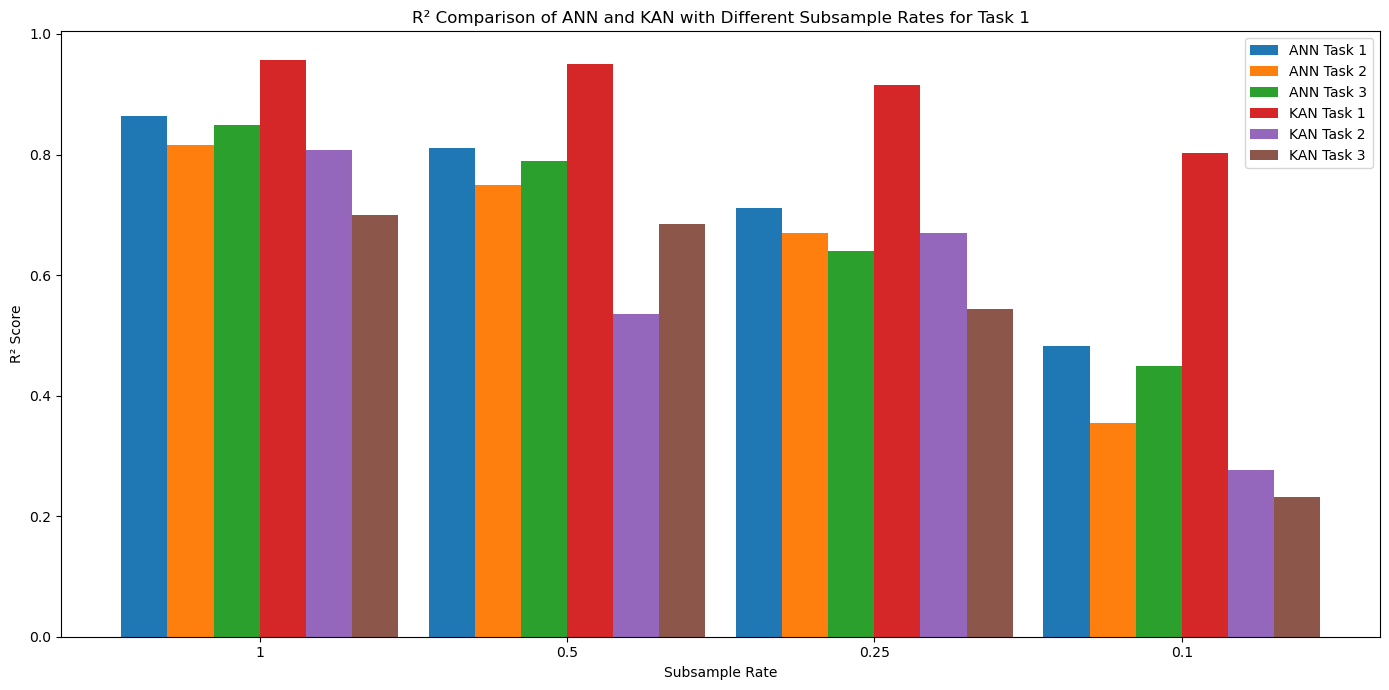

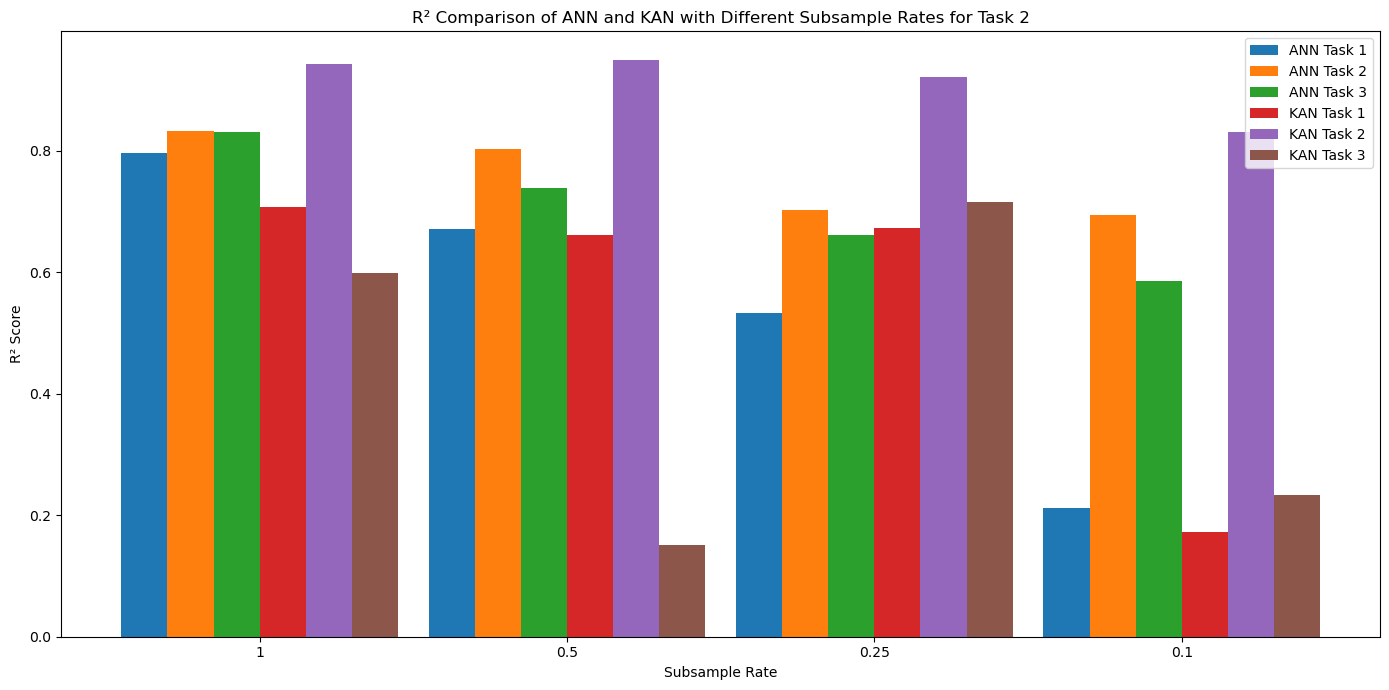

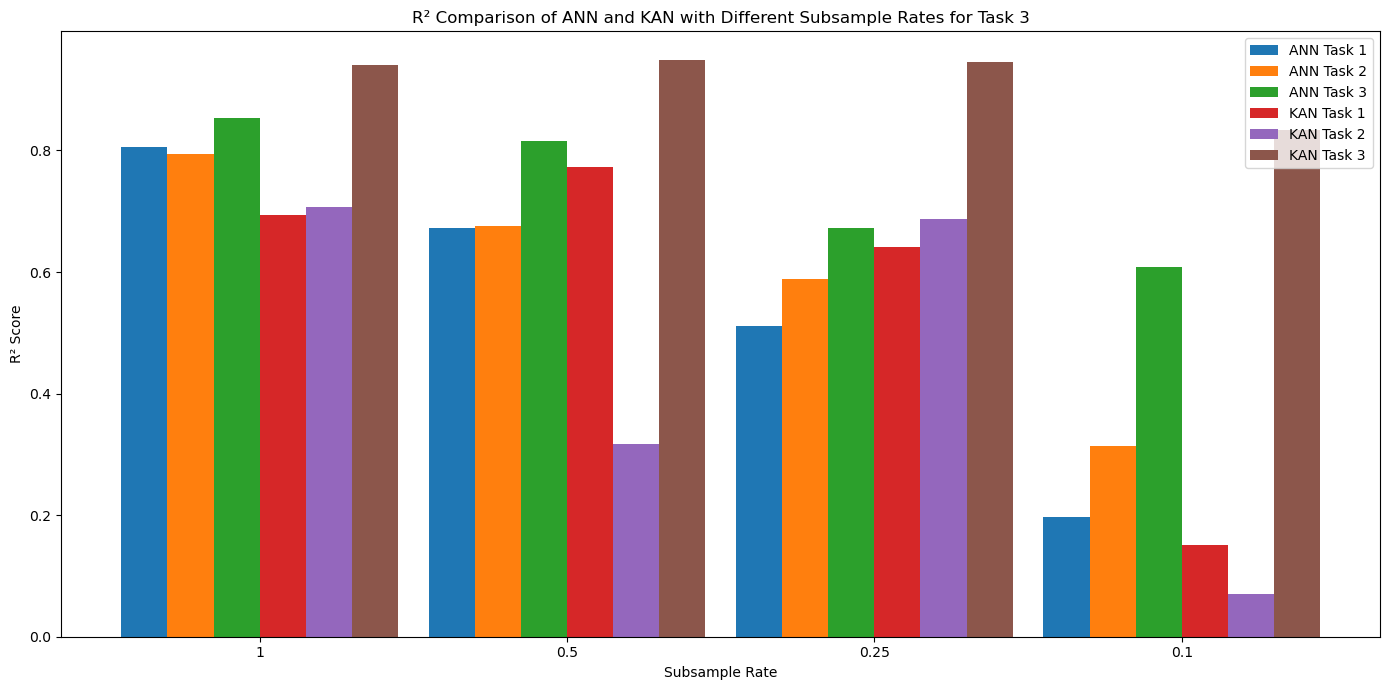

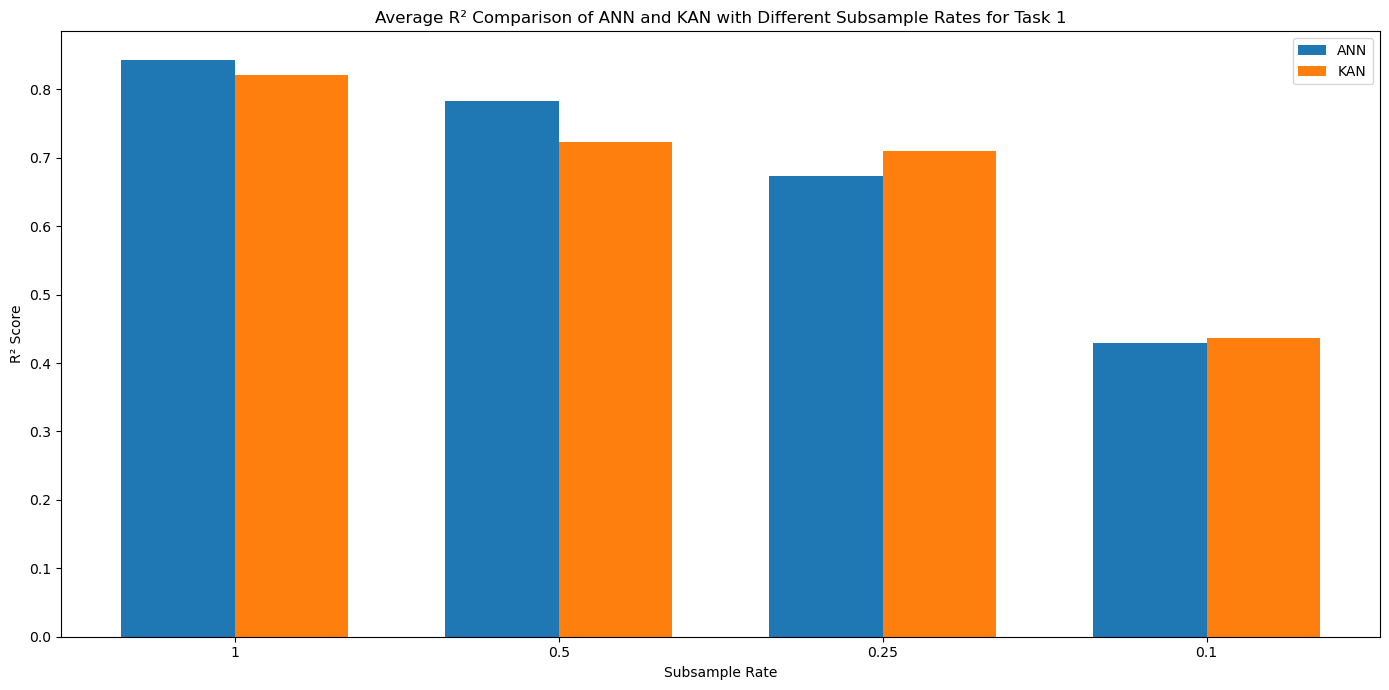

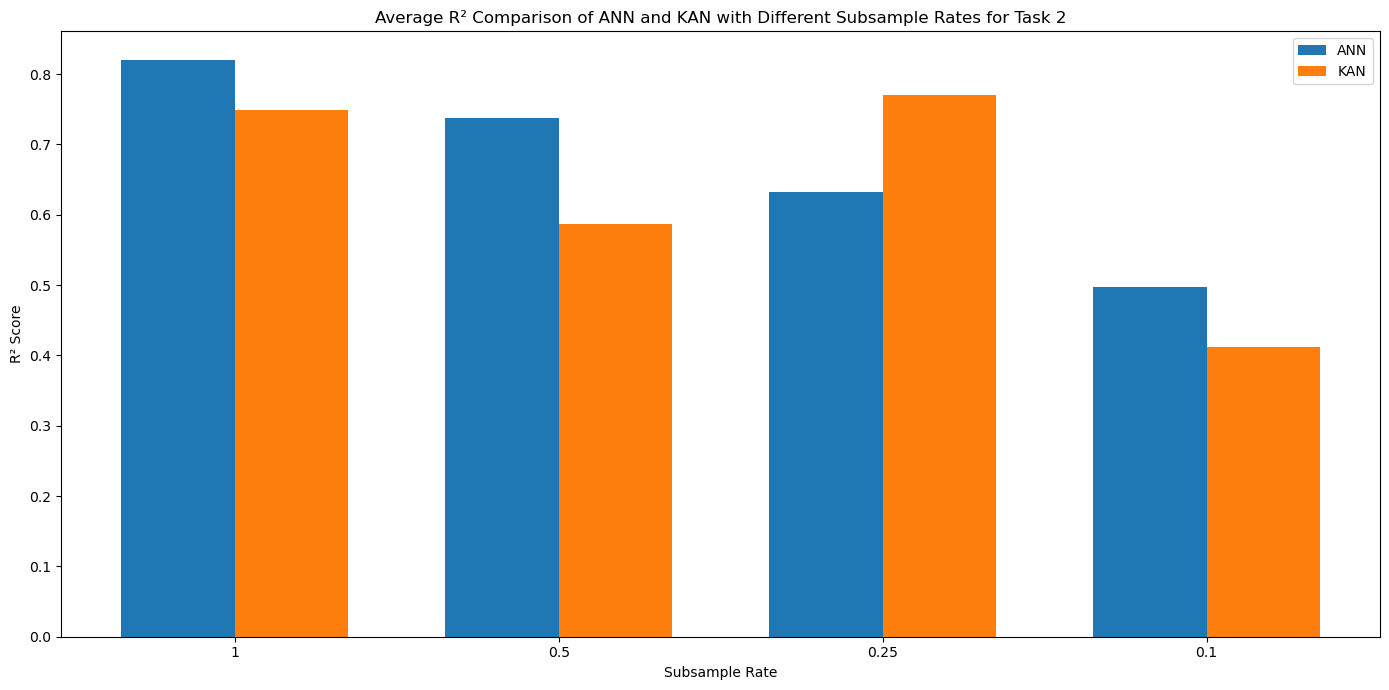

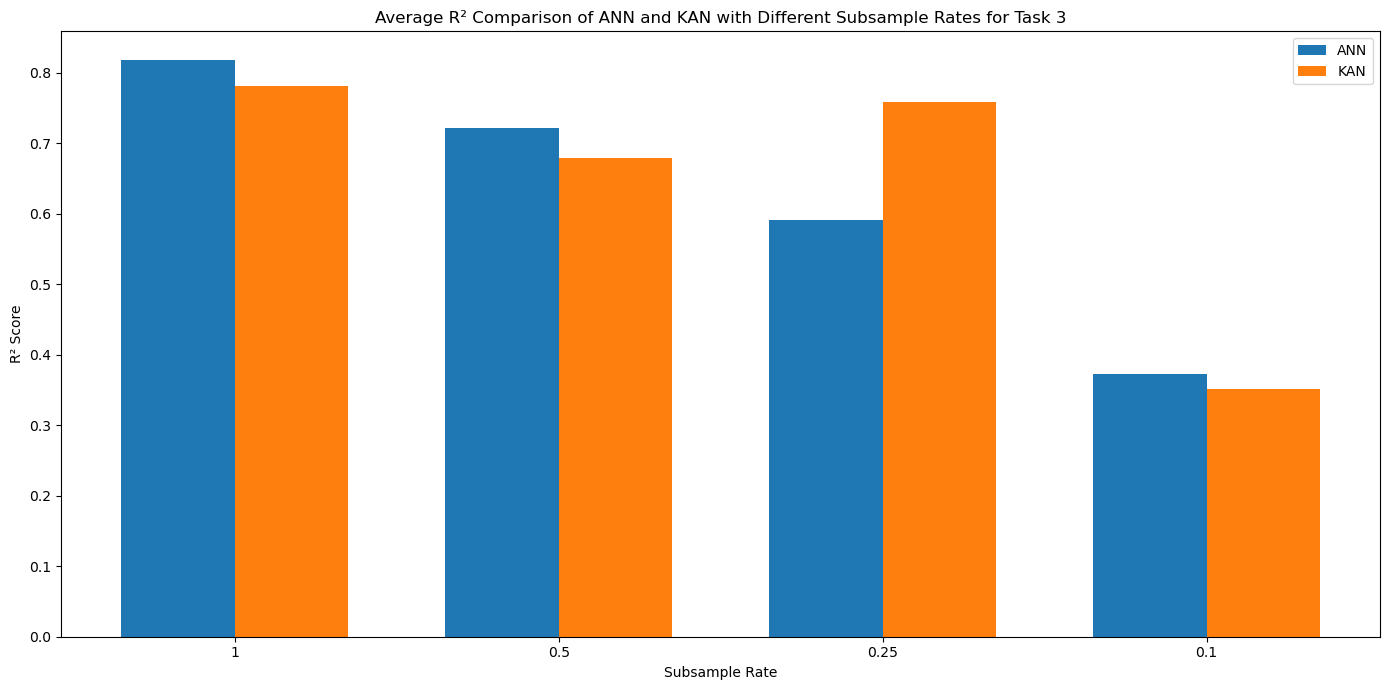

In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from kan import KAN, add_symbolic
from torch.utils.data import TensorDataset, DataLoader

# Load the dataset
data_path = 'RoofTypicalDays_Winter Typical.csv'
data = pd.read_csv(data_path)

# Define input and output columns
input_columns = ['Temp', 'Dew', 'Hum', 'Pres', 'Area', 'u-Value (Roof)', 'Heat Capacity']
output_column = 'Winter Typical:Heat Flow'
num_tasks = 3

# Prepare the data
X = data[input_columns].values
y = data[output_column].values

# Define subsampling rates
subsample_rates = [1, 0.5, 0.25, 0.1]

# Define the ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(X.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Train the ANN model with early stopping
def train_ann(model, train_loader, val_loader, criterion, optimizer, epochs=200, patience=10):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        # Validation step
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

# Evaluate the ANN model
def evaluate_ann(model, X_tensors, y_tensors):
    model.eval()
    all_predictions = []
    all_actuals = []
    with torch.no_grad():
        for X, y in zip(X_tensors, y_tensors):
            outputs = model(X)
            all_predictions.append(outputs.numpy())
            all_actuals.append(y.numpy())
    return all_predictions, all_actuals

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Train the KAN model using the tutorial's approach with early stopping
def train_kan_with_early_stopping(model, dataset, patience=5, steps=200):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0

    optimizer = torch.optim.LBFGS(model.parameters(), lr=1)

    def closure():
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        return loss

    for step in range(steps):
        optimizer.step(closure)
        
        # Validation step
        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()

        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

# Function to train and evaluate models on each subsample rate
def train_and_evaluate_models(subsample_rate, X, y):
    # Subsample the data
    if subsample_rate < 1:
        X_sub, _, y_sub, _ = train_test_split(X, y, test_size=1 - subsample_rate, random_state=42)
    else:
        X_sub, y_sub = X, y

    # Split the dataset into multiple tasks
    X_splits = np.array_split(X_sub, num_tasks)
    y_splits = np.array_split(y_sub, num_tasks)

    # Normalize the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_splits_scaled = [scaler_X.fit_transform(X_split) for X_split in X_splits]
    y_splits_scaled = [scaler_y.fit_transform(y_split.reshape(-1, 1)).flatten() for y_split in y_splits]

    # Convert to tensors
    X_splits_tensors = [torch.tensor(X_split, dtype=torch.float32) for X_split in X_splits_scaled]
    y_splits_tensors = [torch.tensor(y_split, dtype=torch.float32).unsqueeze(1) for y_split in y_splits_scaled]

    # Initialize and train the ANN model on sequential tasks
    ann_model = ANN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

    ann_r2_scores = [[] for _ in range(num_tasks)]
    for task_id in range(num_tasks):
        print(f"Training ANN on task {task_id + 1} with subsample rate {subsample_rate}")

        # Split the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_splits_tensors[task_id], y_splits_tensors[task_id], test_size=0.2, random_state=42)
        
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        val_dataset = TensorDataset(X_val, y_val)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        train_ann(ann_model, train_loader, val_loader, criterion, optimizer, epochs=200, patience=10)

        print("Evaluating ANN on all tasks")
        all_predictions, all_actuals = evaluate_ann(ann_model, X_splits_tensors, y_splits_tensors)
        for i in range(num_tasks):
            mae, mse, r2 = calculate_metrics(all_predictions[i], all_actuals[i], y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])
            ann_r2_scores[i].append(r2)
            print(f"Task {i + 1} - MAE: {mae}, MSE: {mse}, R2: {r2}")

    # Initialize and train the KAN model on sequential tasks
    kan_model = KAN(width=[len(input_columns), 5, 1], grid=10, k=10, seed=0)

    kan_r2_scores = [[] for _ in range(num_tasks)]
    for task_id in range(num_tasks):
        print(f"Training KAN on task {task_id + 1} with subsample rate {subsample_rate}")

        # Split the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_splits_tensors[task_id], y_splits_tensors[task_id], test_size=0.2, random_state=42)

        dataset = {
            'train_input': X_train,
            'train_label': y_train,
            'test_input': X_val,
            'test_label': y_val
        }
        train_kan_with_early_stopping(kan_model, dataset, patience=3, steps=100)

        print("Evaluating KAN on all tasks")
        all_predictions_kan = []
        for X in X_splits_tensors:
            with torch.no_grad():
                predictions_kan_scaled = kan_model(X).numpy()
            all_predictions_kan.append(predictions_kan_scaled)

        for i in range(num_tasks):
            mae, mse, r2 = calculate_metrics(all_predictions_kan[i], y_splits_scaled[i], y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])
            kan_r2_scores[i].append(r2)
            print(f"Task {i + 1} - MAE: {mae}, MSE: {mse}, R2: {r2}")

    return ann_r2_scores, kan_r2_scores

# Perform the training and evaluation for each subsample rate
all_ann_r2_scores = [[] for _ in range(num_tasks)]
all_kan_r2_scores = [[] for _ in range(num_tasks)]

for subsample_rate in subsample_rates:
    print(f"Subsample rate: {subsample_rate}")
    ann_r2_scores, kan_r2_scores = train_and_evaluate_models(subsample_rate, X, y)
    for i in range(num_tasks):
        all_ann_r2_scores[i].append(ann_r2_scores[i])
        all_kan_r2_scores[i].append(kan_r2_scores[i])

# Convert lists to numpy arrays for easier plotting
all_ann_r2_scores = np.array(all_ann_r2_scores)
all_kan_r2_scores = np.array(all_kan_r2_scores)

# Plot the R² comparison for ANN and KAN with different subsample rates for each task
for task_id in range(num_tasks):
    plt.figure(figsize=(14, 7))
    bar_width = 0.15
    index = np.arange(len(subsample_rates))

    plt.bar(index, all_ann_r2_scores[task_id][:, 0], bar_width, label=f'ANN Task 1')
    plt.bar(index + bar_width, all_ann_r2_scores[task_id][:, 1], bar_width, label=f'ANN Task 2')
    plt.bar(index + 2 * bar_width, all_ann_r2_scores[task_id][:, 2], bar_width, label=f'ANN Task 3')

    plt.bar(index + 3 * bar_width, all_kan_r2_scores[task_id][:, 0], bar_width, label=f'KAN Task 1', linestyle='--')
    plt.bar(index + 4 * bar_width, all_kan_r2_scores[task_id][:, 1], bar_width, label=f'KAN Task 2', linestyle='--')
    plt.bar(index + 5 * bar_width, all_kan_r2_scores[task_id][:, 2], bar_width, label=f'KAN Task 3', linestyle='--')

    plt.xlabel('Subsample Rate')
    plt.ylabel('R² Score')
    plt.title(f'R² Comparison of ANN and KAN with Different Subsample Rates for Task {task_id + 1}')
    plt.xticks(index + 2.5 * bar_width, subsample_rates)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'R2_Comparison_Subsample_Rates_Task_{task_id + 1}.png', dpi=300)
    plt.show()

# Plot the average R² comparison for ANN and KAN with different subsample rates
for task_id in range(num_tasks):
    plt.figure(figsize=(14, 7))
    bar_width = 0.35
    index = np.arange(len(subsample_rates))

    ann_mean_r2 = np.mean(all_ann_r2_scores[task_id], axis=1)
    kan_mean_r2 = np.mean(all_kan_r2_scores[task_id], axis=1)

    plt.bar(index - bar_width / 2, ann_mean_r2, bar_width, label='ANN')
    plt.bar(index + bar_width / 2, kan_mean_r2, bar_width, label='KAN')

    plt.xlabel('Subsample Rate')
    plt.ylabel('R² Score')
    plt.title(f'Average R² Comparison of ANN and KAN with Different Subsample Rates for Task {task_id + 1}')
    plt.xticks(index, subsample_rates)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'Average_R2_Comparison_Subsample_Rates_Task_{task_id + 1}.png', dpi=300)
    plt.show()



Subsample rate: 1
Training ANN with subsample rate 1
Epoch [1/200], Loss: 0.8991, Val Loss: 0.7237
Epoch [2/200], Loss: 0.7158, Val Loss: 0.6385
Epoch [3/200], Loss: 0.4509, Val Loss: 0.5402
Epoch [4/200], Loss: 0.3207, Val Loss: 0.4641
Epoch [5/200], Loss: 0.4339, Val Loss: 0.4302
Epoch [6/200], Loss: 0.3684, Val Loss: 0.3961
Epoch [7/200], Loss: 0.2419, Val Loss: 0.3729
Epoch [8/200], Loss: 0.5290, Val Loss: 0.3503
Epoch [9/200], Loss: 0.2273, Val Loss: 0.3394
Epoch [10/200], Loss: 0.2610, Val Loss: 0.3198
Epoch [11/200], Loss: 0.2660, Val Loss: 0.2988
Epoch [12/200], Loss: 0.3709, Val Loss: 0.3001
Epoch [13/200], Loss: 0.3405, Val Loss: 0.2780
Epoch [14/200], Loss: 0.2148, Val Loss: 0.2682
Epoch [15/200], Loss: 0.1668, Val Loss: 0.2530
Epoch [16/200], Loss: 0.3259, Val Loss: 0.2538
Epoch [17/200], Loss: 0.1522, Val Loss: 0.2494
Epoch [18/200], Loss: 0.3118, Val Loss: 0.2351
Epoch [19/200], Loss: 0.2128, Val Loss: 0.2191
Epoch [20/200], Loss: 0.2545, Val Loss: 0.2183
Epoch [21/200], 

Epoch [18/200], Loss: 0.2703, Val Loss: 0.3285
Epoch [19/200], Loss: 0.3131, Val Loss: 0.3216
Epoch [20/200], Loss: 0.4274, Val Loss: 0.3374
Epoch [21/200], Loss: 0.1550, Val Loss: 0.3129
Epoch [22/200], Loss: 0.3092, Val Loss: 0.3118
Epoch [23/200], Loss: 0.3836, Val Loss: 0.2962
Epoch [24/200], Loss: 0.3995, Val Loss: 0.3012
Epoch [25/200], Loss: 0.1936, Val Loss: 0.2954
Epoch [26/200], Loss: 0.2506, Val Loss: 0.2832
Epoch [27/200], Loss: 0.0870, Val Loss: 0.2792
Epoch [28/200], Loss: 0.2351, Val Loss: 0.2864
Epoch [29/200], Loss: 0.2200, Val Loss: 0.2813
Epoch [30/200], Loss: 0.2062, Val Loss: 0.2916
Epoch [31/200], Loss: 0.2945, Val Loss: 0.2834
Epoch [32/200], Loss: 0.3293, Val Loss: 0.2738
Epoch [33/200], Loss: 0.4599, Val Loss: 0.2735
Epoch [34/200], Loss: 0.2394, Val Loss: 0.2591
Epoch [35/200], Loss: 0.2371, Val Loss: 0.2596
Epoch [36/200], Loss: 0.3010, Val Loss: 0.2546
Epoch [37/200], Loss: 0.2351, Val Loss: 0.2768
Epoch [38/200], Loss: 0.1931, Val Loss: 0.2731
Epoch [39/200

Epoch [20/200], Loss: 0.7091, Val Loss: 0.5006
Epoch [21/200], Loss: 0.4264, Val Loss: 0.4761
Epoch [22/200], Loss: 0.5795, Val Loss: 0.4737
Epoch [23/200], Loss: 0.6293, Val Loss: 0.4709
Epoch [24/200], Loss: 0.2935, Val Loss: 0.4510
Epoch [25/200], Loss: 0.2534, Val Loss: 0.4374
Epoch [26/200], Loss: 0.2674, Val Loss: 0.4347
Epoch [27/200], Loss: 0.4000, Val Loss: 0.4148
Epoch [28/200], Loss: 0.5307, Val Loss: 0.4126
Epoch [29/200], Loss: 0.2489, Val Loss: 0.4179
Epoch [30/200], Loss: 0.1956, Val Loss: 0.4072
Epoch [31/200], Loss: 0.3451, Val Loss: 0.4043
Epoch [32/200], Loss: 0.1624, Val Loss: 0.4045
Epoch [33/200], Loss: 0.1647, Val Loss: 0.3890
Epoch [34/200], Loss: 0.2713, Val Loss: 0.4160
Epoch [35/200], Loss: 0.2918, Val Loss: 0.3778
Epoch [36/200], Loss: 0.2588, Val Loss: 0.3714
Epoch [37/200], Loss: 0.1159, Val Loss: 0.3756
Epoch [38/200], Loss: 0.3052, Val Loss: 0.3738
Epoch [39/200], Loss: 0.4043, Val Loss: 0.3697
Epoch [40/200], Loss: 0.3067, Val Loss: 0.3617
Epoch [41/200

Epoch [10/200], Loss: 0.8062, Val Loss: 0.7721
Epoch [11/200], Loss: 0.6483, Val Loss: 0.7691
Epoch [12/200], Loss: 0.8667, Val Loss: 0.7655
Epoch [13/200], Loss: 0.5715, Val Loss: 0.7637
Epoch [14/200], Loss: 0.3908, Val Loss: 0.7603
Epoch [15/200], Loss: 0.8527, Val Loss: 0.7573
Epoch [16/200], Loss: 0.5688, Val Loss: 0.7558
Epoch [17/200], Loss: 0.6177, Val Loss: 0.7515
Epoch [18/200], Loss: 1.2439, Val Loss: 0.7541
Epoch [19/200], Loss: 0.8628, Val Loss: 0.7536
Epoch [20/200], Loss: 1.0185, Val Loss: 0.7467
Epoch [21/200], Loss: 0.7633, Val Loss: 0.7455
Epoch [22/200], Loss: 0.5753, Val Loss: 0.7467
Epoch [23/200], Loss: 0.4244, Val Loss: 0.7362
Epoch [24/200], Loss: 0.7086, Val Loss: 0.7375
Epoch [25/200], Loss: 0.6740, Val Loss: 0.7342
Epoch [26/200], Loss: 0.7485, Val Loss: 0.7362
Epoch [27/200], Loss: 0.4525, Val Loss: 0.7247
Epoch [28/200], Loss: 0.3983, Val Loss: 0.7281
Epoch [29/200], Loss: 0.6579, Val Loss: 0.7240
Epoch [30/200], Loss: 0.5804, Val Loss: 0.7288
Epoch [31/200

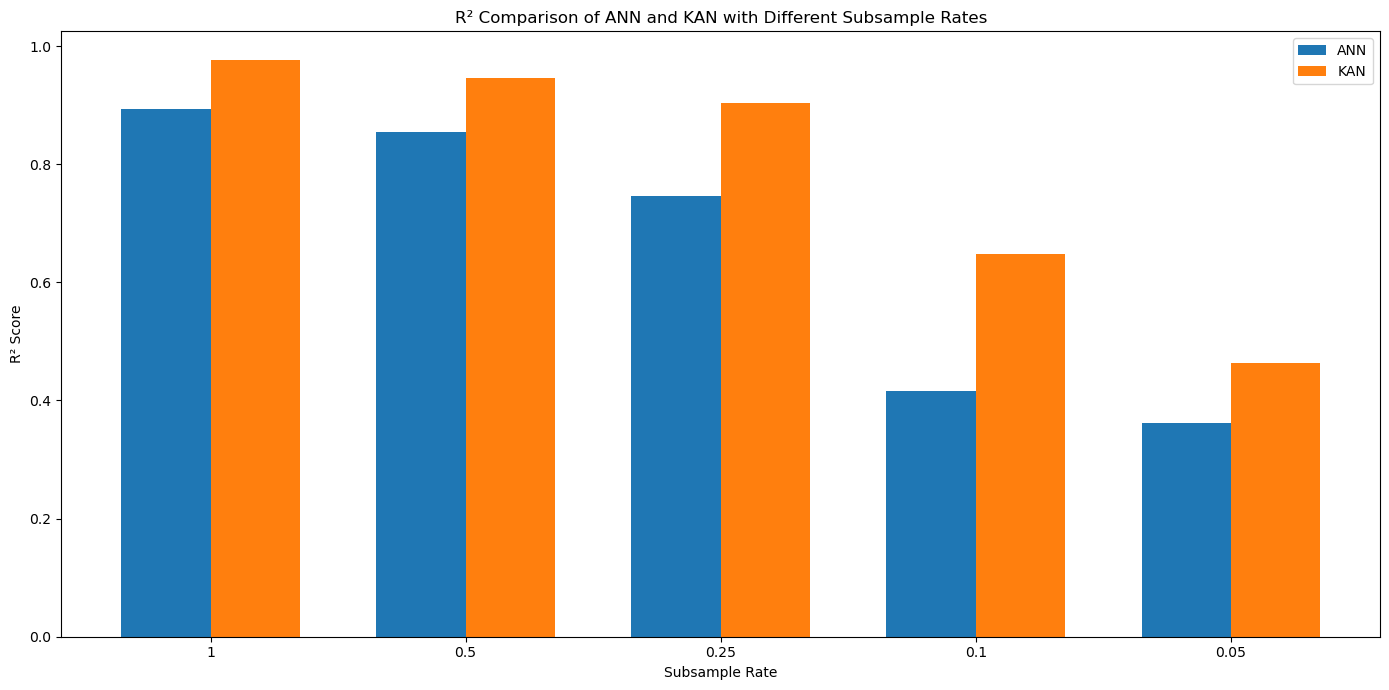

In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from kan import KAN, add_symbolic
from torch.utils.data import TensorDataset, DataLoader

# Load the dataset
data_path = 'RoofTypicalDays_Winter Typical.csv'
data = pd.read_csv(data_path)

# Define input and output columns
input_columns = ['Temp', 'Dew', 'Hum', 'Pres', 'Area', 'u-Value (Roof)', 'Heat Capacity']
output_column = 'Winter Typical:Heat Flow'
num_tasks = 3

# Prepare the data
X = data[input_columns].values
y = data[output_column].values

# Define subsampling rates
subsample_rates = [1, 0.5, 0.25, 0.1, 0.05]

# Define the ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(X.shape[1], 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Train the ANN model with early stopping
def train_ann(model, train_loader, val_loader, criterion, optimizer, epochs=200, patience=10):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        # Validation step
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader)

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

# Evaluate the ANN model
def evaluate_ann(model, test_loader):
    model.eval()
    all_predictions = []
    all_actuals = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            all_predictions.append(outputs.numpy())
            all_actuals.append(targets.numpy())
    predictions = np.concatenate(all_predictions)
    actuals = np.concatenate(all_actuals)
    return predictions, actuals

# Define function to calculate performance metrics
def calculate_metrics(predictions, actuals, y_std, y_mean):
    predictions_denorm = predictions * y_std + y_mean
    actuals_denorm = actuals * y_std + y_mean
    mae = mean_absolute_error(actuals_denorm, predictions_denorm)
    mse = mean_squared_error(actuals_denorm, predictions_denorm)
    r2 = r2_score(actuals_denorm, predictions_denorm)
    return mae, mse, r2

# Train the KAN model using the tutorial's approach with early stopping
def train_kan_with_early_stopping(model, dataset, patience=5, steps=200):
    best_loss = float('inf')
    best_model_state = None
    patience_counter = 0

    optimizer = torch.optim.LBFGS(model.parameters(), lr=1)

    def closure():
        optimizer.zero_grad()
        outputs = model(dataset['train_input'])
        loss = nn.MSELoss()(outputs, dataset['train_label'])
        loss.backward()
        return loss

    for step in range(steps):
        optimizer.step(closure)
        
        # Validation step
        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = nn.MSELoss()(val_outputs, dataset['test_label']).item()

        print(f'Step [{step+1}/{steps}], Val Loss: {val_loss:.4f}')

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Load the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

# Function to train and evaluate models on each subsample rate
def train_and_evaluate_models(subsample_rate, X, y):
    # Subsample the data
    if subsample_rate < 1:
        X_sub, _, y_sub, _ = train_test_split(X, y, test_size=1 - subsample_rate, random_state=42)
    else:
        X_sub, y_sub = X, y

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

    # Normalize the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).unsqueeze(1)
    y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32).unsqueeze(1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize and train the ANN model
    ann_model = ANN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

    print(f"Training ANN with subsample rate {subsample_rate}")
    train_ann(ann_model, train_loader, test_loader, criterion, optimizer, epochs=200, patience=10)

    print("Evaluating ANN on test set")
    predictions_ann, actuals_ann = evaluate_ann(ann_model, test_loader)
    mae_ann, mse_ann, r2_ann = calculate_metrics(predictions_ann, actuals_ann, y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])

    # Initialize and train the KAN model
    kan_model = KAN(width=[len(input_columns), 20, 1], grid=10, k=10, seed=0)
    dataset = {
        'train_input': X_train_tensor,
        'train_label': y_train_tensor,
        'test_input': X_test_tensor,
        'test_label': y_test_tensor
    }

    print(f"Training KAN with subsample rate {subsample_rate}")
    train_kan_with_early_stopping(kan_model, dataset, patience=3, steps=100)

    print("Evaluating KAN on test set")
    with torch.no_grad():
        predictions_kan_scaled = kan_model(X_test_tensor).numpy()
    mae_kan, mse_kan, r2_kan = calculate_metrics(predictions_kan_scaled, y_test_scaled, y_std=scaler_y.scale_[0], y_mean=scaler_y.mean_[0])

    return r2_ann, r2_kan

# Perform the training and evaluation for each subsample rate
ann_r2_scores = []
kan_r2_scores = []

for subsample_rate in subsample_rates:
    print(f"Subsample rate: {subsample_rate}")
    r2_ann, r2_kan = train_and_evaluate_models(subsample_rate, X, y)
    ann_r2_scores.append(r2_ann)
    kan_r2_scores.append(r2_kan)

# Convert lists to numpy arrays for easier plotting
ann_r2_scores = np.array(ann_r2_scores)
kan_r2_scores = np.array(kan_r2_scores)

# Plot the R² comparison for ANN and KAN with different subsample rates
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = np.arange(len(subsample_rates))

plt.bar(index, ann_r2_scores, bar_width, label='ANN')
plt.bar(index + bar_width, kan_r2_scores, bar_width, label='KAN')

plt.xlabel('Subsample Rate')
plt.ylabel('R² Score')
plt.title('R² Comparison of ANN and KAN with Different Subsample Rates')
plt.xticks(index + bar_width / 2, subsample_rates)
plt.legend()
plt.tight_layout()
plt.savefig('R2_Comparison_Subsample_Rates.png', dpi=300)
plt.show()

